In [1]:
# pacotes comuns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Pacotes de machine learn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Ignorar avisos
import warnings
warnings.filterwarnings("ignore");

In [2]:
X = 3 * np.random.rand(100, 1);
theta_0 = 4;
theta_1 = 3;
Y = theta_0 + theta_1 * X + np.random.randn(100, 1);#Essa função é a mesma usada no ensino médio "função afim ou função linear com coeficiente angular positivo".

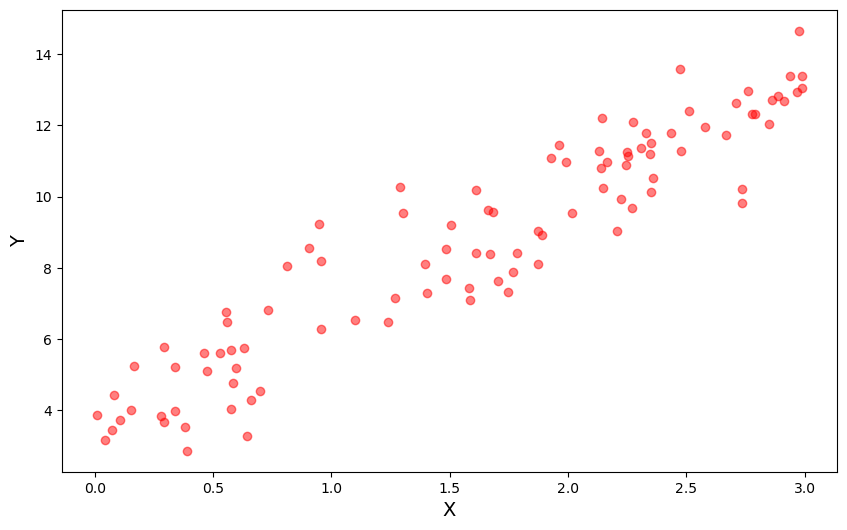

In [3]:
plt.figure(figsize=(10, 6));
plt.scatter(X, Y, c="r", alpha=0.5);
plt.xlabel("X", fontsize=14);
plt.ylabel("Y", fontsize=14);
plt.show();

In [4]:
y_bar = np.mean(Y);
X_bar = np.mean(X);
m = np.concatenate((X,Y), axis=1);
covXY = np.cov(m, rowvar=False)[0][1];
varX = np.cov(m, rowvar=False)[0][0];
theta_1_est = covXY/varX;
theta_0_est = y_bar - theta_1* X_bar;
Y_hat = theta_0 + theta_1 * X;

print("O intercepto estimado foi %.3f" %theta_0_est);
print("A inclinação estimada foi %.3f" %theta_1_est);

O intercepto estimado foi 3.903
A inclinação estimada foi 3.200


In [ ]:
plt.figure(figsize=(10, 6));
plt.scatter(X, Y, c="r", alpha=0.5);
plt.scatter(X, Y_hat, c="b", alpha=0.5);
plt.xlabel("X", fontsize=14);
plt.ylabel("Y", fontsize=14);
plt.show();

In [6]:
regression = LinearRegression();
regression.fit(X,Y);
new_theta_0 = regression.intercept_;
new_theta_1 = regression.coef_;
print("O intercepto estimado foi %.3f" %new_theta_0);
print("A inclinação estimada foi %.3f" %new_theta_1);

O intercepto estimado foi 3.585
A inclinação estimada foi 3.200


In [ ]:
#load the diabets dataset
diabetes = datasets.load_diabetes();

data = pd.DataFrame(data=diabetes["data"], columns=diabetes["feature_names"]);
data["target"] = diabetes["target"];
print(data);
features = ["age","sex","bmi","bp"];
Y_var = ["target"];
data[features+Y_var].head();

In [15]:
mod = smf.ols(formula="target ~ age + sex + bmi + bp", data=data);
reg = mod.fit();
print(reg.summary());

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     72.91
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           2.70e-47
Time:                        15:32:27   Log-Likelihood:                -2434.2
No. Observations:                 442   AIC:                             4878.
Df Residuals:                     437   BIC:                             4899.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.853     53.329      0.0

In [16]:
X = data[features].copy();
Y = data[Y_var].copy();

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, train_size=0.8, random_state=42);
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42);

In [17]:
print(X_train.shape);
print(X_val.shape);
print(X_test.shape);

(353, 4)
(45, 4)
(44, 4)


In [18]:
regression = LinearRegression();
regression.fit(X_train, Y_train);
predict_train = regression.predict(X_train);
predict_test = regression.predict(X_test);

print("R2 da regressão no conjunto treino foi %.5f" %r2_score(Y_train, predict_train));
print("R2 da regressão no conjunto testes foi %.5f" %r2_score(Y_test, predict_test));

R2 da regressão no conjunto treino foi 0.42032
R2 da regressão no conjunto testes foi 0.28665


In [19]:
punicao = 0.01;
lasso = Lasso(alpha=punicao);
lasso.fit(X_train, Y_train);
predict_train = lasso.predict(X_train);
predict_test = lasso.predict(X_test);

print("R2 da regressão no conjunto treino foi %.5f" %r2_score(Y_train, predict_train));
print("R2 da regressão no conjunto testes foi %.5f" %r2_score(Y_test, predict_test));

R2 da regressão no conjunto treino foi 0.42029
R2 da regressão no conjunto testes foi 0.28777


In [21]:
punicoes_base10 = -np.linspace(0,10,num=40,endpoint=True);
punicoes = np.exp(punicoes_base10);
punicoes

array([1.00000000e+00, 7.73824437e-01, 5.98804260e-01, 4.63369369e-01,
       3.58566541e-01, 2.77467552e-01, 2.14711172e-01, 1.66148752e-01,
       1.28569965e-01, 9.94905805e-02, 7.69882425e-02, 5.95753834e-02,
       4.61008875e-02, 3.56739933e-02, 2.76054078e-02, 2.13617392e-02,
       1.65302358e-02, 1.27915004e-02, 9.89837561e-03, 7.65960493e-03,
       5.92718948e-03, 4.58660406e-03, 3.54922631e-03, 2.74647805e-03,
       2.12529183e-03, 1.64460275e-03, 1.27263380e-03, 9.84795135e-04,
       7.62058541e-04, 5.89699522e-04, 4.56323901e-04, 3.53114586e-04,
       2.73248695e-04, 2.11446518e-04, 1.63622483e-04, 1.26615076e-04,
       9.79778397e-05, 7.58176466e-05, 5.86695477e-05, 4.53999298e-05])

In [22]:
melhor_resultado_val = -np.inf;
melhor_punicao = None;
for punicao in punicoes:
    lasso = Lasso(alpha = punicao);
    lasso.fit(X_train, Y_train);
    previsao_val = lasso.predict(X_val);
    r2_val = r2_score(Y_val, previsao_val);
    print("Punição %.5f: R2-valdiação = %.5f" %(punicao,r2_val));
    if r2_val >= melhor_resultado_val:
        melhor_punicao = punicao;
        melhor_resultado_val = r2_val;

Punição 1.00000: R2-valdiação = 0.23646
Punição 0.77382: R2-valdiação = 0.26715
Punição 0.59880: R2-valdiação = 0.28533
Punição 0.46337: R2-valdiação = 0.29606
Punição 0.35857: R2-valdiação = 0.30236
Punição 0.27747: R2-valdiação = 0.30604
Punição 0.21471: R2-valdiação = 0.30817
Punição 0.16615: R2-valdiação = 0.30902
Punição 0.12857: R2-valdiação = 0.30854
Punição 0.09949: R2-valdiação = 0.30831
Punição 0.07699: R2-valdiação = 0.30795
Punição 0.05958: R2-valdiação = 0.30755
Punição 0.04610: R2-valdiação = 0.30717
Punição 0.03567: R2-valdiação = 0.30683
Punição 0.02761: R2-valdiação = 0.30654
Punição 0.02136: R2-valdiação = 0.30631
Punição 0.01653: R2-valdiação = 0.30611
Punição 0.01279: R2-valdiação = 0.30596
Punição 0.00990: R2-valdiação = 0.30584
Punição 0.00766: R2-valdiação = 0.30574
Punição 0.00593: R2-valdiação = 0.30567
Punição 0.00459: R2-valdiação = 0.30561
Punição 0.00355: R2-valdiação = 0.30556
Punição 0.00275: R2-valdiação = 0.30552
Punição 0.00213: R2-valdiação = 0.30549


In [23]:
melhor_punicao

0.16614875210349944

r2 da regressão Lasso com a melhor punição no conjunto treino = 0.41354
r2 da regressão Lasso com a melhor punição no conjunto testes = 0.29548


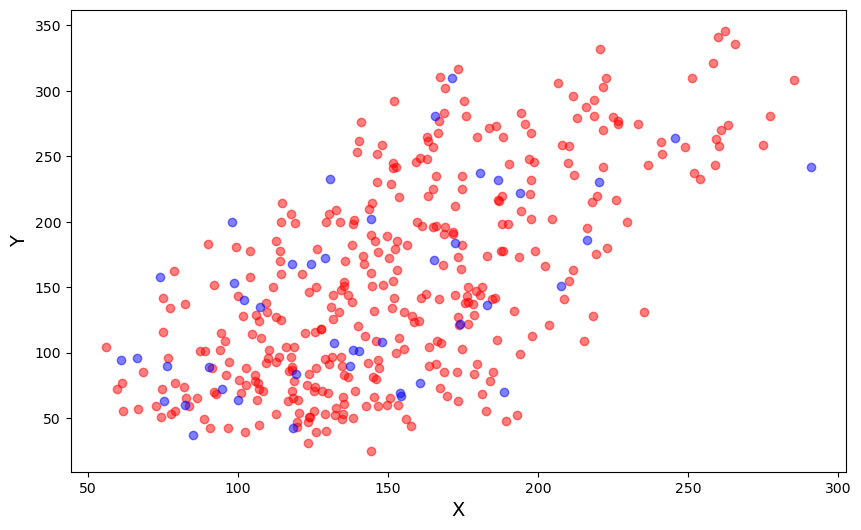

In [25]:
punicao = melhor_punicao;
lasso = Lasso(alpha=punicao);
lasso.fit(X_train,Y_train);
predict_train = lasso.predict(X_train);
predict_test = lasso.predict(X_test);

print("r2 da regressão Lasso com a melhor punição no conjunto treino = %.5f" %r2_score(Y_train, predict_train));
print("r2 da regressão Lasso com a melhor punição no conjunto testes = %.5f" %r2_score(Y_test, predict_test));

plt.figure(figsize=(10, 6));
plt.scatter(predict_train, Y_train, c="r", alpha=0.5);
plt.scatter(predict_test, Y_test, c="b", alpha=0.5);
plt.xlabel("X", fontsize=14);
plt.ylabel("Y", fontsize=14);
plt.show();